# Titanic project
## import needed packets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

## data

In [2]:
train = pd.read_csv("ttrain.csv")
test = pd.read_csv("ttest.csv")

df = pd.concat([train,test],axis=0).reset_index(drop=True)  


In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [5]:
df.Fare.value_counts()

Fare
8.0500     60
13.0000    59
7.7500     55
26.0000    50
7.8958     49
           ..
7.7417      1
8.1583      1
8.4583      1
7.8000      1
7.7208      1
Name: count, Length: 281, dtype: int64

In [6]:
print(df.SibSp.value_counts()), print(df.Parch.value_counts())

SibSp
0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: count, dtype: int64
Parch
0    1002
1     170
2     113
3       8
5       6
4       6
6       2
9       2
Name: count, dtype: int64


(None, None)

In [7]:
df.Cabin.value_counts()

Cabin
C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
C22 C26            4
F33                4
                  ..
A14                1
E63                1
E12                1
E38                1
C105               1
Name: count, Length: 186, dtype: int64

In [8]:
df.Ticket.sample(10)

432            SC/AH 3085
172                347742
664     STON/O 2. 3101285
1262                16966
459                371060
358                330931
546                  2908
822                 19972
861                 28134
431                376564
Name: Ticket, dtype: object

### feature engineering 

In [9]:
# if ticket is numeric, it is a number, if not, it is a string. give 1 for number, otherwise take the first letter of the string 
df["Ticket"] = df["Ticket"].apply(lambda x: 1 if x.isnumeric() else 0)

In [10]:
df.Ticket.value_counts()

Ticket
1    957
0    352
Name: count, dtype: int64

In [11]:
df.drop(["Cabin"],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   int64  
 9   Fare         1308 non-null   float64
 10  Embarked     1307 non-null   object 
dtypes: float64(3), int64(5), object(3)
memory usage: 112.6+ KB


In [12]:
df["Parent_size"] = df["SibSp"] + df["Parch"] + 1

In [13]:
# name is not important, but the title is important.
df["Title"] = df.Name.str.extract("([A-Za-z]+)\.")
df["Title"].value_counts()


Title
Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: count, dtype: int64

In [14]:
# if title is rare, give it as rare, otherwise take the title
df["Title"] = df["Title"].replace(["Dr","Rev","Col","Major","Mlle","Jonkheer","Countess","Sir","Lady","Capt","Don","Dona"],"Rare")
df["Title"] = df["Title"].replace(["Mme","Ms","Mlle"],"Miss")

df["Title"].value_counts()

Title
Mr        757
Miss      263
Mrs       197
Master     61
Rare       31
Name: count, dtype: int64

In [15]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Parent_size,Title
625,626,0.0,1,"Sutton, Mr. Frederick",male,61.0,0,0,1,32.3208,S,1,Mr
479,480,1.0,3,"Hirvonen, Miss. Hildur E",female,2.0,0,1,1,12.2875,S,2,Miss
165,166,1.0,3,"Goldsmith, Master. Frank John William ""Frankie""",male,9.0,0,2,1,20.5250,S,3,Master
796,797,1.0,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,1,25.9292,S,1,Rare
824,825,0.0,3,"Panula, Master. Urho Abraham",male,2.0,4,1,1,39.6875,S,6,Master
232,233,0.0,2,"Sjostedt, Mr. Ernst Adolf",male,59.0,0,0,1,13.5000,S,1,Mr
418,419,0.0,2,"Matthews, Mr. William John",male,30.0,0,0,1,13.0000,S,1,Mr
1051,1052,NaN,3,"Smyth, Miss. Julia",female,NaN,0,0,1,7.7333,Q,1,Miss
193,194,1.0,2,"Navratil, Master. Michel M",male,3.0,1,1,1,26.0000,S,3,Master
319,320,1.0,1,"Spedden, Mrs. Frederic Oakley (Margaretta Corn...",female,40.0,1,1,1,134.5000,C,3,Mrs


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   int64  
 9   Fare         1308 non-null   float64
 10  Embarked     1307 non-null   object 
 11  Parent_size  1309 non-null   int64  
 12  Title        1309 non-null   object 
dtypes: float64(3), int64(6), object(4)
memory usage: 133.1+ KB


### empty data

In [17]:
df["Fare"] = df["Fare"].fillna(df["Fare"].mean())
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])
df["Age"] = df["Age"].fillna(df["Age"].mean())

In [18]:
#name and id to another df2
df2 = df[["Name","PassengerId"]]
df.drop(["Name","PassengerId"],axis=1,inplace=True)
df.sample(6)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Parent_size,Title
1015,NaN,3,male,29.881138,0,0,1,7.7500,Q,1,Mr
789,0.0,1,male,46.000000,0,0,0,79.2000,C,1,Mr
666,0.0,2,male,25.000000,0,0,1,13.0000,S,1,Mr
149,0.0,2,male,42.000000,0,0,1,13.0000,S,1,Rare
500,0.0,3,male,17.000000,0,0,1,8.6625,S,1,Mr
583,0.0,1,male,36.000000,0,0,1,40.1250,C,1,Mr


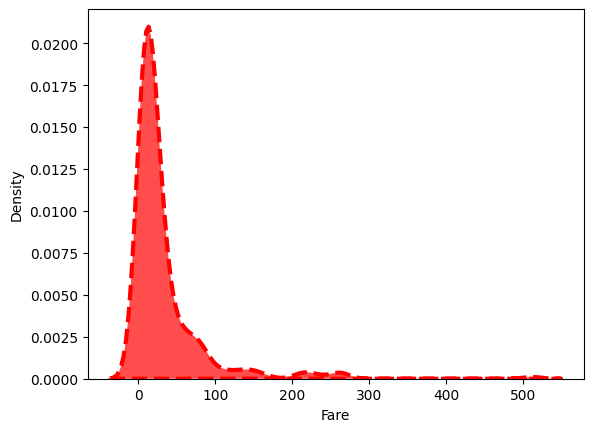

In [19]:
#fare - plot
sns.kdeplot(df["Fare"],shade=True,color="r",label="Fare",alpha=0.7,linewidth=3,linestyle="--")
plt.show()

In [20]:
df["Fare_class"] = pd.qcut(df.Fare,5,labels=[1,2,3,4,5])

In [21]:
#fare_class -> numeric
df["Fare_class"] = df["Fare_class"].astype(int)



In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    float64
 1   Pclass       1309 non-null   int64  
 2   Sex          1309 non-null   object 
 3   Age          1309 non-null   float64
 4   SibSp        1309 non-null   int64  
 5   Parch        1309 non-null   int64  
 6   Ticket       1309 non-null   int64  
 7   Fare         1309 non-null   float64
 8   Embarked     1309 non-null   object 
 9   Parent_size  1309 non-null   int64  
 10  Title        1309 non-null   object 
 11  Fare_class   1309 non-null   int32  
dtypes: float64(3), int32(1), int64(5), object(3)
memory usage: 117.7+ KB


In [23]:
df = pd.get_dummies(df,columns=["Sex","Embarked","Title"],drop_first=True)

In [24]:
#corr 


df.corr().Survived.abs().sort_values(ascending=False)

Survived       1.000000
Title_Mr       0.549199
Sex_male       0.543351
Title_Mrs      0.339040
Pclass         0.338481
Title_Miss     0.332795
Fare_class     0.318106
Fare           0.257307
Embarked_S     0.149683
Parch          0.081629
Age            0.070323
SibSp          0.035322
Parent_size    0.016639
Title_Rare     0.005646
Embarked_Q     0.003650
Ticket         0.001492
Name: Survived, dtype: float64

In [25]:
df.head(5)

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Parent_size,Fare_class,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0.0,3,22.0,1,0,0,7.2500,2,1,True,False,True,False,True,False,False
1,1.0,1,38.0,1,0,0,71.2833,2,5,False,False,False,False,False,True,False
2,1.0,3,26.0,0,0,0,7.9250,1,2,False,False,True,True,False,False,False
3,1.0,1,35.0,1,0,1,53.1000,2,5,False,False,True,False,False,True,False
4,0.0,3,35.0,0,0,1,8.0500,1,2,True,False,True,False,True,False,False


In [26]:
df.tail(5)

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Parent_size,Fare_class,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
1304,NaN,3,29.881138,0,0,0,8.0500,1,2,True,False,True,False,True,False,False
1305,NaN,1,39.000000,0,0,0,108.9000,1,5,False,False,False,False,False,False,True
1306,NaN,3,38.500000,0,0,0,7.2500,1,1,True,False,True,False,True,False,False
1307,NaN,3,29.881138,0,0,1,8.0500,1,2,True,False,True,False,True,False,False
1308,NaN,3,29.881138,1,1,1,22.3583,3,4,True,False,False,False,False,False,False


In [27]:
#train test split
train = df.iloc[:891]
test = df.iloc[891:]

train["Survived"] = train["Survived"].astype(int)


### algo test imported

In [28]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def algo_test_classification(x, y):
    # Bütün modelleri tanımlıyorum
    log_reg = LogisticRegression()
    knn = KNeighborsClassifier()
    rf = RandomForestClassifier()
    ada = AdaBoostClassifier()
    gbdt = GradientBoostingClassifier()
    svc = SVC()
    nb = GaussianNB()
    dt = DecisionTreeClassifier()
    mlp = MLPClassifier()

    algos = [log_reg, knn, rf, ada, gbdt, svc, nb, dt, mlp]
    algo_names = ['Logistic Regression', 'KNN', 'Random Forest', 'AdaBoost', 'Gradient Boosting', 
                   'SVC', 'Naive Bayes', 'Decision Tree', 'MLP']

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
    
    accuracy = []
    precision = []
    recall = []
    f1 = []

    # Hata ve doğruluk oranlarını bir tablo haline getirmek için bir dataframe oluşturuyorum
    result = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1 Score'], index=algo_names)
    
    for algo in algos:
        p = algo.fit(x_train, y_train).predict(x_test)
        accuracy.append(accuracy_score(y_test, p))
        precision.append(precision_score(y_test, p, average='weighted'))
        recall.append(recall_score(y_test, p, average='weighted'))
        f1.append(f1_score(y_test, p, average='weighted'))
        
    # result adlı tabloya doğruluk ve hata oranlarımı yerleştiriyorum
    result.Accuracy = accuracy
    result.Precision = precision
    result.Recall = recall
    result.F1_Score = f1
    
    # Oluşturduğum result tablosunu doğruluk oranına (accuracy) göre sıralayıp dönüyor
    rtable = result.sort_values('Accuracy', ascending=False)
    return rtable


In [29]:

x = train.drop(["Survived"],axis=1)

y = train["Survived"]

# algo_test_classification(x,y)

In [30]:
# try with columns that are corr > 0.1

df_try = df[["Survived","Title_Mr","Sex_male","Pclass","Fare_class","Parent_size","Age","Ticket","Embarked_Q","Embarked_S","Title_Miss","Title_Mrs","Fare"]]

train_try = df_try.iloc[:891]
test_try = df_try.iloc[891:]

x_try = train_try.drop(["Survived"],axis=1)
y_try = train_try["Survived"]

# algo_test_classification(x_try,y_try)


In [31]:
#predictions to csv
rf = RandomForestClassifier()
rf.fit(x,y)
predictions = rf.predict(test.drop(["Survived"],axis=1))
test["Survived"] = predictions
test["PassengerId"] = df2["PassengerId"]
test[["PassengerId","Survived"]].to_csv("titanic_predictions.csv",index=False)



In [32]:
# roc auc score
from sklearn.metrics import roc_auc_score, roc_curve

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_probs = rf.predict_proba(x_test)
y_probs = y_probs[:,1]

roc_auc_score(y_test,y_probs)


0.8879021879021878

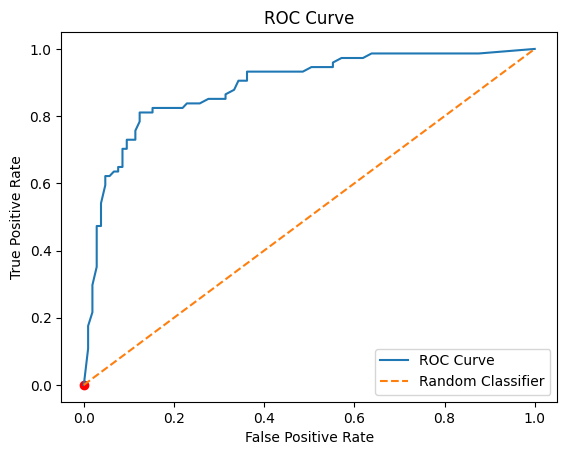

In [34]:
#plot roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], label='Random Classifier', linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


In [35]:
# f1 score
from sklearn.metrics import f1_score
f1_score(y_test,rf.predict(x_test))

0.8079470198675497

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


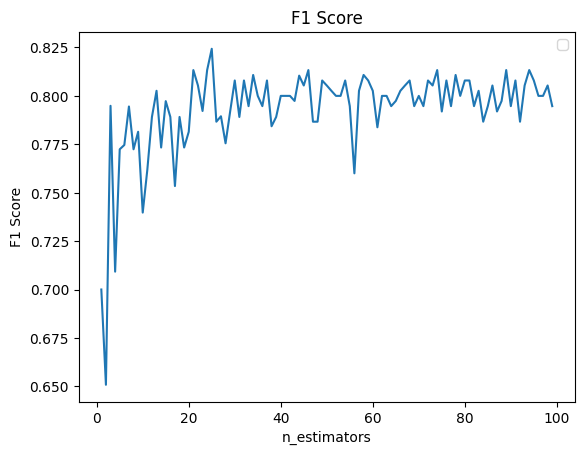

In [43]:
#plot f1 score
f1_scores = []
best_f1_score_n_estimator = 0
for i in range(1,100):
    rf = RandomForestClassifier(n_estimators=i)
    rf.fit(x_train,y_train)
    f1_scores.append(f1_score(y_test,rf.predict(x_test)))
    if f1_score(y_test,rf.predict(x_test)) == max(f1_scores):
        best_f1_score_n_estimator = i


plt.plot(range(1,100),f1_scores)
plt.title("F1 Score")
plt.xlabel("n_estimators")
plt.ylabel("F1 Score")
plt.legend()
plt.show()


In [44]:
best_f1_score_n_estimator

25

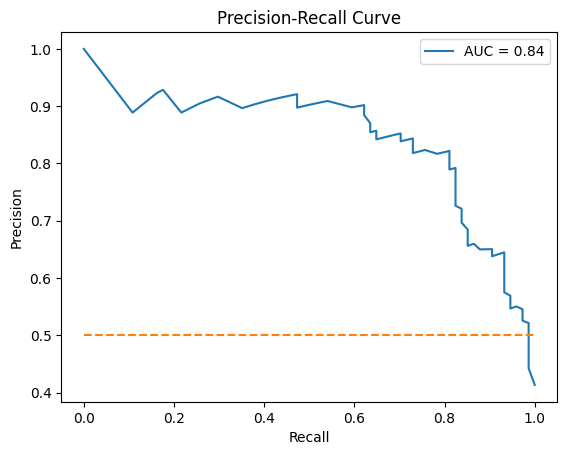

In [38]:
# pr curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
auc_score = auc(recall, precision)

plt.plot(recall, precision, label='AUC = %0.2f' % auc_score)
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()